In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import scipy
# pip install optuna loguru pandas scikit-learn googledrivedownloader matplotlib captum seaborn

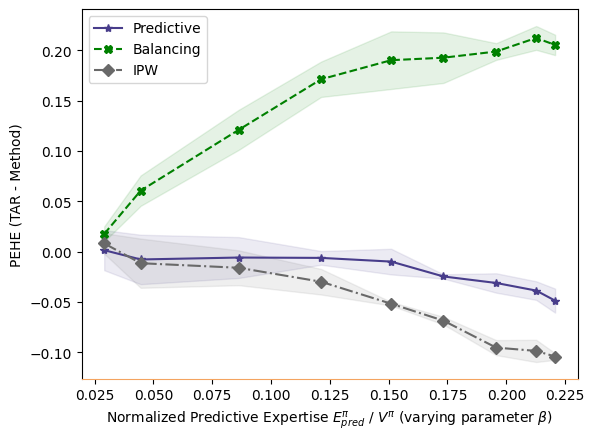

In [27]:
ceval = []
ceerr = []
cfrval = []
cfrerr = []
tarval = []
tarerr = []
ipwval = []
ipwerr = []
paths = ["0.1", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0"]
for i in range(len(paths)):
    ce = []
    cfr = []
    tar = []
    ipw = []
    flag = False
    second = False
    with open("final/prog" + paths[i] + "cate.txt", "r") as myfile:
        for line in myfile:
            if flag:
                second = False
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                tar.append(float(temp[0]))
                ipw.append(float(temp[-1]))
            if flag:
                second = True
            if "seed" in line:
                flag = True

    ceval.append(np.mean(np.array(tar) - np.array(ce)))
    ceerr.append(scipy.stats.sem(np.array(tar) - np.array(ce)))
    cfrval.append(np.mean(np.array(tar) - np.array(cfr)))
    cfrerr.append(scipy.stats.sem(np.array(tar) - np.array(cfr)))
    ipwval.append(np.mean(np.array(tar) - np.array(ipw)))
    ipwerr.append(scipy.stats.sem(np.array(tar) - np.array(ipw)))
    tarval.append(np.mean(np.array(tar)))
    tarerr.append(scipy.stats.sem(np.array(tar)))

gtval = []
gterr = []
avval = []
averr = []
for i in range(len(paths)):
    flag = False
    second = False
    gt = []
    av = []
    with open("final/entropyprog40x" + paths[i] + ".txt", "r") as myfile:
        for line in myfile:
            if flag:
                second = False
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                # ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                # cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                # tar.append(float(temp[0]))
                temp = temp[-1].split("gt")
                # ipw.append(float(temp[0]))
                temp = temp[-1].split("av")
                gt.append(float(temp[0]))
                av.append(float(temp[-1]))
            if flag:
                second = True
            if "seed" in line:
                flag = True

    gtval.append(np.mean(np.array(gt)))
    gterr.append(scipy.stats.sem(np.array(gt)))
    avval.append(np.mean(np.array(av)))
    averr.append(scipy.stats.sem(np.array(av)))

xaxis = range(len(paths))
ax = plt.axes()
ax.spines['bottom'].set_color("sandybrown")

plt.plot(np.array(gtval) / np.array(avval), np.array(ceval), label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.plot(np.array(gtval) / np.array(avval), np.array(cfrval), label="Balancing", color="green", linestyle="--", marker="X")
plt.plot(np.array(gtval) / np.array(avval), np.array(ipwval), label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ceval)-np.array(ceerr)), (np.array(ceval)+np.array(ceerr)), alpha=0.1, color="darkslateblue")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(cfrval)-np.array(cfrerr)), (np.array(cfrval)+np.array(cfrerr)), alpha=0.1, color="green")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ipwval)-np.array(ipwerr)), (np.array(ipwval)+np.array(ipwerr)), alpha=0.1, color="dimgray")
# plt.plot(np.array(gtval)[indices] / np.array(avval)[indices], np.array(tarval)[indices], label="tar", color="yellow", linestyle="-.", marker="D")
# plt.fill_between(np.array(gtval)[indices] / np.array(avval)[indices], (np.array(tarval)-np.array(tarerr))[indices], (np.array(tarval)+np.array(tarerr))[indices], alpha=0.1, color="darkslateblue")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel("PEHE (TAR - Method)")
plt.savefig("propscale.pdf")
plt.show()

with open("beta-policyaware.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(ceval)[i]))
        f.write("\n")

with open("beta-policyaware-lower.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval)-np.array(ceerr))[i]))
        f.write("\n")

with open("beta-policyaware-upper.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval)+np.array(ceerr))[i]))
        f.write("\n")


with open("beta-balancing.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(cfrval)[i]))
        f.write("\n")

with open("beta-balancing-lower.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval)-np.array(cfrerr))[i]))
        f.write("\n")

with open("beta-balancing-upper.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval)+np.array(cfrerr))[i]))
        f.write("\n")


with open("beta-propensity.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(ipwval)[i]))
        f.write("\n")

with open("beta-propensity-lower.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval)-np.array(ipwerr))[i]))
        f.write("\n")

with open("beta-propensity-upper.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval)+np.array(ipwerr))[i]))
        f.write("\n")


with open("beta-tar.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(tarval)[i]))
        f.write("\n")

with open("beta-tar-lower.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval)-np.array(tarerr))[i]))
        f.write("\n")

with open("beta-tar-upper.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval)+np.array(tarerr))[i]))
        f.write("\n")

## Expertise and Randomness

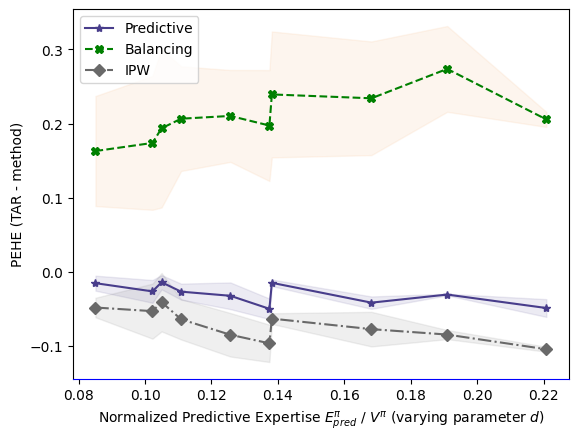

In [28]:
ce = []
cfr = []
ipw = []
tar = []
with open("final/prog4.0cate.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            ce.append(list())
            cfr.append(list())
            ipw.append(list())
            tar.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("van")
            ipw[seed-1].append(float(temp[0]))

ceval = np.flip(np.mean(np.array(tar) - np.array(ce), axis=0))
ceerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(ce), axis=0))
cfrval = np.flip(np.mean(np.array(tar) - np.array(cfr), axis=0))
cfrerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(cfr), axis=0))
ipwval = np.flip(np.mean(np.array(tar) - np.array(ipw), axis=0))
ipwerr = np.flip(scipy.stats.sem(np.array(tar) - np.array(ipw), axis=0))
tarval = np.flip(np.mean(np.array(tar), axis=0))
tarerr = np.flip(scipy.stats.sem(np.array(tar), axis=0))

gt = []
av = []
with open("final/entropyprog40x4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            gt.append(list())
            av.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            # ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            # cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            # tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("gt")
            # ipw[seed-1].append(float(temp[0]))
            temp = temp[-1].split("av")
            gt[seed-1].append(float(temp[0]))
            av[seed-1].append(float(temp[-1]))

gtval = np.flip(np.mean(np.array(gt), axis=0))
gterr = np.flip(scipy.stats.sem(np.array(gt), axis=0))
avval = np.flip(np.mean(np.array(av), axis=0))
averr = np.flip(scipy.stats.sem(np.array(av), axis=0))
ax = plt.axes()
ax.spines['bottom'].set_color("blue")

plt.plot(gtval / avval, ceval, label="Predictive", color="darkslateblue", linestyle="-", marker="*")
plt.fill_between(gtval / avval, (ceval-ceerr), (ceval+ceerr), alpha=0.1, color="darkslateblue")
plt.plot(gtval / avval, cfrval, label="Balancing", color="green", linestyle="--", marker="X")
plt.fill_between(gtval / avval, (cfrval-cfrerr), (cfrval+cfrerr), alpha=0.1, color="sandybrown")
plt.plot(gtval / avval, ipwval, label="IPW", color="dimgray", linestyle="-.", marker="D")
plt.fill_between(gtval / avval, (ipwval-ipwerr), (ipwval+ipwerr), alpha=0.1, color="dimgray")

plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel("PEHE (TAR - method)")
plt.savefig("feature.pdf")
plt.show()


with open("d-policyaware.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(ceval)[i]))
        f.write("\n")

with open("d-policyaware-lower.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval)-np.array(ceerr))[i]))
        f.write("\n")

with open("d-policyaware-upper.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval)+np.array(ceerr))[i]))
        f.write("\n")


with open("d-balancing.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(cfrval)[i]))
        f.write("\n")

with open("d-balancing-lower.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval)-np.array(cfrerr))[i]))
        f.write("\n")

with open("d-balancing-upper.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval)+np.array(cfrerr))[i]))
        f.write("\n")


with open("d-propensity.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(ipwval)[i]))
        f.write("\n")

with open("d-propensity-lower.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval)-np.array(ipwerr))[i]))
        f.write("\n")

with open("d-propensity-upper.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval)+np.array(ipwerr))[i]))
        f.write("\n")


with open("d-tar.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str(np.array(tarval)[i]))
        f.write("\n")

with open("d-tar-lower.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval)-np.array(tarerr))[i]))
        f.write("\n")

with open("d-tar-upper.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval)+np.array(tarerr))[i]))
        f.write("\n")

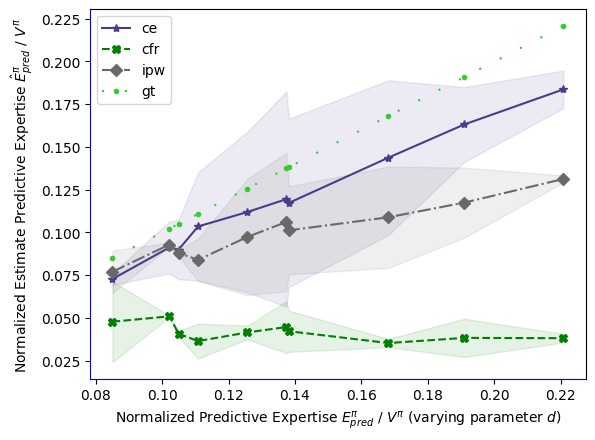

In [29]:
ce = []
cfr = []
ipw = []
tar = []
gt = []
av = []
with open("final/entropyprog40x4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            ce.append(list())
            cfr.append(list())
            ipw.append(list())
            tar.append(list())
            gt.append(list())
            av.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("ce")
            temp = temp[-1].split("cfr")
            ce[seed-1].append(float(temp[0]))
            temp = temp[-1].split("tar")
            cfr[seed-1].append(float(temp[0]))
            temp = temp[-1].split("ipw")
            tar[seed-1].append(float(temp[0]))
            temp = temp[-1].split("gt")
            ipw[seed-1].append(float(temp[0]))
            temp = temp[-1].split("av")
            gt[seed-1].append(float(temp[0]))
            av[seed-1].append(float(temp[-1]))

ceval = np.flip(np.mean(np.array(ce), axis=0))
ceerr = np.flip(scipy.stats.sem(np.array(ce), axis=0))
cfrval = np.flip(np.mean(np.array(cfr), axis=0))
cfrerr = np.flip(scipy.stats.sem(np.array(cfr), axis=0))
ipwval = np.flip(np.mean(np.array(ipw), axis=0))
ipwerr = np.flip(scipy.stats.sem(np.array(ipw), axis=0))
tarval = np.flip(np.mean(np.array(tar), axis=0))
tarerr = np.flip(scipy.stats.sem(np.array(tar), axis=0))
gtval = np.flip(np.mean(np.array(gt), axis=0))
gterr = np.flip(scipy.stats.sem(np.array(gt), axis=0))
avval = np.flip(np.mean(np.array(av), axis=0))
averr = np.flip(scipy.stats.sem(np.array(av), axis=0))
xaxis = range(len(ceval))
my_xticks = ['irrelevant', '', '', '', '', '', '', 'predictive']


ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")


plt.plot(gtval / avval, ceval / avval, label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(gtval / avval, cfrval / avval, label="cfr", color="green", linestyle="--", marker="X")
plt.plot(gtval / avval, ipwval / avval, label="ipw", color="dimgray", linestyle="-.", marker="D")
# plt.plot(gtval[indices][start:] / avval[indices][start:], tarval[indices][start:] / avval[indices][start:], label="tar", color="dimgray", linestyle="-.", marker="D")
plt.plot(gtval / avval, gtval / avval, label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(gtval / avval, (ceval-ceerr) / avval, (ceval+ceerr) / avval, alpha=0.1, color="darkslateblue")
plt.fill_between(gtval / avval, (cfrval-cfrerr) / avval, (cfrval+cfrerr) / avval, alpha=0.1, color="green")
plt.fill_between(gtval / avval, (ipwval-ipwerr) / avval, (ipwval+ipwerr) / avval, alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (tarval[indices][start:]-tarerr[indices][start:]) / avval[indices][start:], (tarval[indices][start:]+tarerr[indices][start:]) / avval[indices][start:], alpha=0.1, color="dimgray")
# plt.fill_between(gtval[indices][start:] / avval[indices][start:], (gtval[indices][start:]-gterr[indices][start:]) / avval[indices][start:], (gtval[indices][start:]+gterr[indices][start:]) / avval[indices][start:], alpha=0.1, color="limegreen")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $d$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("featureexpertise.pdf")
plt.show()

with open("expd-policyaware.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval))[i]))
        f.write("\n")

with open("expd-policyaware-lower.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval) - np.array(ceerr) / np.array(avval))[i]))
        f.write("\n")

with open("expd-policyaware-upper.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval) + np.array(ceerr) / np.array(avval))[i]))
        f.write("\n")


with open("expd-balancing.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval))[i]))
        f.write("\n")

with open("expd-balancing-lower.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval) - np.array(cfrerr) / np.array(avval))[i]))
        f.write("\n")

with open("expd-balancing-upper.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval) + np.array(cfrerr) / np.array(avval))[i]))
        f.write("\n")


with open("expd-propensity.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval))[i]))
        f.write("\n")

with open("expd-propensity-lower.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval) - np.array(ipwerr) / np.array(avval))[i]))
        f.write("\n")

with open("expd-propensity-upper.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval) + np.array(ipwerr) / np.array(avval))[i]))
        f.write("\n")


with open("expd-tar.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval))[i]))
        f.write("\n")

with open("expd-tar-lower.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval) - np.array(tarerr) / np.array(avval))[i]))
        f.write("\n")

with open("expd-tar-upper.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval) + np.array(tarerr) / np.array(avval))[i]))
        f.write("\n")

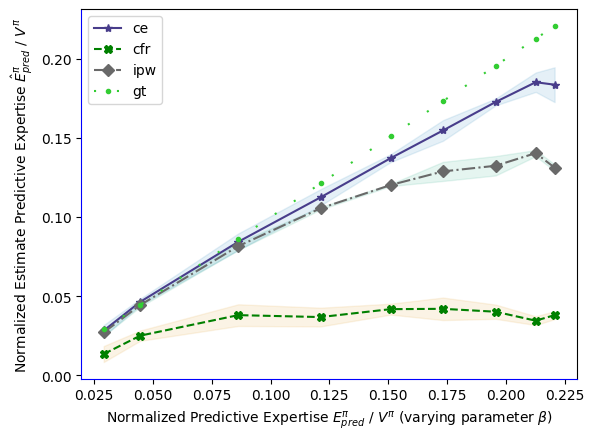

In [30]:
cblind_palete = sns.color_palette("colorblind", as_cmap=True)
ceval = []
ceerr = []
cfrval = []
cfrerr = []
tarval = []
tarerr = []
ipwval = []
ipwerr = []
gtval = []
gterr = []
avval = []
averr = []
paths = ["0.1.txt", "0.5.txt", "1.0.txt", "1.5.txt", "2.0.txt", "2.5.txt", "3.0.txt", "3.5.txt", "4.0.txt"]
for i in range(len(paths)):
    ce = []
    cfr = []
    tar = []
    ipw = []
    flag = False
    gt = []
    av = []
    with open("final/entropyprog40x" + paths[i], "r") as myfile:
        for line in myfile:
            if flag:
                flag = False
                temp = line.split("ce")
                temp = temp[-1].split("cfr")
                ce.append(float(temp[0]))
                temp = temp[-1].split("tar")
                cfr.append(float(temp[0]))
                temp = temp[-1].split("ipw")
                tar.append(float(temp[0]))
                temp = temp[-1].split("gt")
                ipw.append(float(temp[0]))
                temp = temp[-1].split("av")
                gt.append(float(temp[0]))
                av.append(float(temp[-1]))
            if "seed" in line:
                flag = True

    ceval.append(np.mean(np.array(ce)))
    ceerr.append(scipy.stats.sem(np.array(ce)))
    cfrval.append(np.mean(np.array(cfr)))
    cfrerr.append(scipy.stats.sem(np.array(cfr)))
    ipwval.append(np.mean(np.array(ipw)))
    ipwerr.append(scipy.stats.sem(np.array(ipw)))
    gtval.append(np.mean(np.array(gt)))
    gterr.append(scipy.stats.sem(np.array(gt)))
    avval.append(np.mean(np.array(av)))
    averr.append(scipy.stats.sem(np.array(av)))
    tarval.append(np.mean(np.array(tar)))
    tarerr.append(scipy.stats.sem(np.array(tar)))

xaxis = range(len(paths))

ax = plt.axes()
ax.spines['bottom'].set_color("blue")
ax.spines['left'].set_color("blue")
plt.plot(np.array(gtval) / np.array(avval), np.array(ceval) / np.array(avval), label="ce", color="darkslateblue", linestyle="-", marker="*")
plt.plot(np.array(gtval) / np.array(avval), np.array(cfrval) / np.array(avval), label="cfr", color="green", linestyle="--", marker="X")
plt.plot(np.array(gtval) / np.array(avval), np.array(ipwval) / np.array(avval), label="ipw", color="dimgray", linestyle="-.", marker="D")
plt.plot(np.array(gtval) / np.array(avval), np.array(gtval) / np.array(avval), label="gt", color="limegreen", linestyle=(0, (1, 10)), marker=".")
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ceval)-np.array(ceerr)) / np.array(avval), (np.array(ceval)+np.array(ceerr)) / np.array(avval), alpha=0.1, color=cblind_palete[0])
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(cfrval)-np.array(cfrerr)) / np.array(avval), (np.array(cfrval)+np.array(cfrerr)) / np.array(avval), alpha=0.1, color=cblind_palete[1])
plt.fill_between(np.array(gtval) / np.array(avval), (np.array(ipwval)-np.array(ipwerr)) / np.array(avval), (np.array(ipwval)+np.array(ipwerr)) / np.array(avval), alpha=0.1, color=cblind_palete[2])
# plt.fill_between(xaxis, (np.array(gtval)-np.array(gterr)) / np.array(avval), (np.array(gtval)+np.array(gterr)) / np.array(avval), alpha=0.1, color=cblind_palete[3])
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$ (varying parameter $\beta$)")
plt.ylabel(r"Normalized Estimate Predictive Expertise $\hat E^{\pi}_{pred}$ / $V^{\pi}$")
plt.savefig("propscaleexpertise.pdf")
plt.show()

with open("expbeta-policyaware.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-policyaware-lower.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval) - np.array(ceerr) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-policyaware-upper.dat", 'a') as f:
    for i in range(len(ceval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ceval) / np.array(avval) + np.array(ceerr) / np.array(avval))[i]))
        f.write("\n")


with open("expbeta-balancing.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-balancing-lower.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval) - np.array(cfrerr) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-balancing-upper.dat", 'a') as f:
    for i in range(len(cfrval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(cfrval) / np.array(avval) + np.array(cfrerr) / np.array(avval))[i]))
        f.write("\n")


with open("expbeta-propensity.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-propensity-lower.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval) - np.array(ipwerr) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-propensity-upper.dat", 'a') as f:
    for i in range(len(ipwval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(ipwval) / np.array(avval) + np.array(ipwerr) / np.array(avval))[i]))
        f.write("\n")


with open("expbeta-tar.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-tar-lower.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval) - np.array(tarerr) / np.array(avval))[i]))
        f.write("\n")

with open("expbeta-tar-upper.dat", 'a') as f:
    for i in range(len(tarval)):
        f.write(str((np.array(gtval) / np.array(avval))[i]) + " " + str((np.array(tarval) / np.array(avval) + np.array(tarerr) / np.array(avval))[i]))
        f.write("\n")